In [1]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
plt.style.use('seaborn-pastel')

<IPython.core.display.Javascript object>


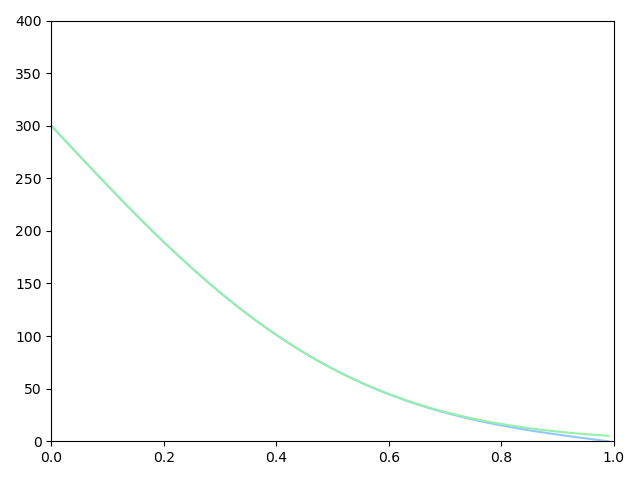

In [106]:
#Схема 0 для линейного уравнения плюсом точное решение в виде функции ошибок
lambd = 0.1
Temp=300
L = 1
T = 1
C_p = 0.4
m = 100
h = L / m
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#зададим граничные условия
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        g_t_h[j + 1][i] = C_p * g_t_h[j][i + 1] + (1 - 2 * C_p)*g_t_h[j][i] + C_p * g_t_h[j][i - 1]

fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    #x_i = np.arange(0, L, h)
    #y = g_t_h[i]
    x_i = np.arange(0, L, h)
    y1 = g_t_h[i]
    ksi = x_i / (2 * np.sqrt(lambd * i * t))
    y2 = Temp * special.erfc(ksi)
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=20000, interval=1, blit=True, repeat = False)
        
#зеленое-теоретическое, синее - численное        

<IPython.core.display.Javascript object>


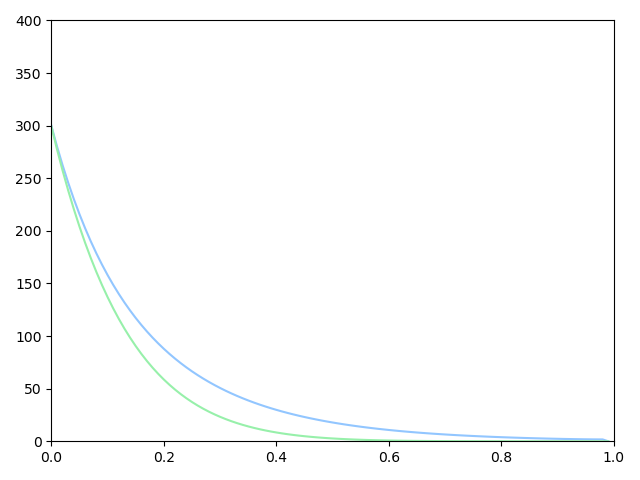

In [124]:
#решение для нелинейной задачи,численное и теоретическое
lambd_0 = 0.1
sigm = 0.1
Temp=300
L = 1
T = 1
C_p = 0.2
m = 100
h = L / m
t = C_p * h ** 2 / (lambd_0 * Temp**sigm)
n = int(T // t)
q = t / (h)**2
eps = 0.1
c = np.sqrt(Temp ** (sigm)*lambd_0 / sigm)
x_i = np.arange(0, L, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i
#граничные условия
g_t_h[0] = eps
for j in range(1, n):
    g_t_h[j][0] = Temp * (t_j[j]) ** (1/sigm)
    
for j in range(r_j - 1):#время
    for i in range(1, r_i - 1): #пространство
        lambd_i_1 = lambd_0 * (g_t_h[j][i - i])**sigm
        lambd_i = lambd_0 * (g_t_h[j][i])**sigm
        lambd_i1 = lambd_0 * (g_t_h[j][i+1])**sigm
        lambd_plus = 2 * (lambd_i * lambd_i1) / (lambd_i + lambd_i1)
        lambd_minus = 2 * (lambd_i*lambd_i_1) / (lambd_i + lambd_i_1)
        g_t_h[j+1][i] = (g_t_h[j][i] * (1 - q *(lambd_minus + lambd_plus)) + g_t_h[j][i+1] * q * lambd_plus + g_t_h[j][i-1] * lambd_minus*q)

def right_decision(x, t):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= c * t:
            ans[i] = (sigm * c * (c * t - x[i]) / lambd_0) ** (1 / sigm)
        else:
            ans[i] = 0
    return ans
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 400))
line = []
N = 2
for j in range(N):
    temp, = plt.plot([], [])
    line.append(temp)
line = tuple(line)
def init():
    for j in range(N):
        line[j].set_data([], [])
    return line,
def animate(i):
    x_i = np.arange(0, L, h)
    y2 = right_decision(x_i, i * t)
    y1 = g_t_h[i]
    line[0].set_data(x_i, y1)
    line[1].set_data(x_i, y2)
    return line,
 
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=n, interval=1, blit=True, repeat = False)     
#зеленое - теоретическое, синее - численное        

In [10]:
#схема 2 трехступенчатая для линейного уравнения прогонкой
lambd = 0.1
Temp=300
L = 1
T = 1
C_p = 0.4
m = 100
h = L / m
t = C_p * h ** 2 / lambd
n = int(T // t)
x_i = np.arange(0, L, h) # значения в узлах по х
t_j = np.linspace(0, T, n) # значение в узлах по t
r_j = len(t_j) # количество узлов по t
r_i = len(x_i) # количество узлов по x
g_t_h = np.zeros([r_j, r_i]) # итоговая сетка размером t_j*x_i, просто температура, t
g1_t_h = np.zeros([r_j, r_i]) # т с волной t
g2_t_h = np.zeros([r_j, r_i]) # т с чертой t / 2
g3_t_h = np.zeros([r_j, r_i]) # т с крышкой t / 2
def fi(x, Temp):
    ans = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] == 0:
            ans[i] = Temp
        else: 
            ans[i] = 0
    return(ans)
T_t_0 = fi(x_i, Temp) # значение при t = 0
T_x_0 = Temp # значение при x = 0
T_x_L = 0
g_t_h[0] = T_t_0 # инициализация сетки t = 0
g1_t_h[0] = T_t_0 # инициализация сетки t = 0
g2_t_h[0] = T_t_0 # инициализация сетки t = 0
g3_t_h[0] = T_t_0 # инициализация сетки t = 0
for i in range(n):
    g_t_h[i][0] = T_x_0 # граничное условие при х =0
alph = np.zeros([r_i])
beta = np.zeros([r_i])
#for j in range(r_j - 1):
j = 0
alph[0] = 0
beta[0] = g_t_h[j][0]
for i in range(1, r_i):
    alph[i] = C_p / (-C_p* alph[i - 1] + 1 + 2 * C_p)
    beta[i] = (g_t_h[j][i] + C_p * beta[i-1]) / (-C_p * alph[i-1] + 1 + 2 * C_p)
    
g1_t_h[j+1][r_i - 1] = (g_t_h[j][r_i - 1] + C_p * beta[r_i - 1]) / (1 + 2 * C_p - C_p * alph[r_i - 1])
for m in range(r_i - 2, 0, -1):
    g1_t_h[j+1][m] = g1_t_h[j+1][m + 1] * alph[m + 1] + beta[m + 1]
        
print(g1_t_h[1])        

[0.00000000e+00 1.64880099e+01 3.86537589e+00 9.06181574e-01
 2.12441187e-01 4.98037693e-02 1.16757747e-02 2.73721681e-03
 6.41700965e-04 1.50437527e-04 3.52679063e-05 8.26805147e-06
 1.93832530e-06 4.54412383e-07 1.06530423e-07 2.49745196e-08
 5.85491557e-09 1.37260043e-09 3.21786354e-10 7.54381650e-11
 1.76853887e-11 4.14608405e-12 9.71989548e-13 2.27868917e-13
 5.34205778e-14 1.25236832e-14 2.93599673e-15 6.88302046e-16
 1.61362478e-16 3.78291033e-17 8.86848712e-18 2.07908877e-18
 4.87412346e-19 1.14266788e-19 2.67881987e-20 6.28010644e-21
 1.47228029e-21 3.45154858e-22 8.09165735e-23 1.89697225e-23
 4.44717756e-24 1.04257658e-24 2.44417026e-25 5.73000432e-26
 1.34331679e-26 3.14921227e-27 7.38287352e-28 1.73080811e-28
 4.05762974e-29 9.51252711e-30 2.23007465e-30 5.22808806e-31
 1.22564977e-31 2.87335893e-32 6.73617518e-33 1.57919902e-33
 3.70220411e-34 8.67928305e-35 2.03473261e-35 4.77013684e-36
 1.11828972e-36 2.62166879e-37 6.14612399e-38 1.44087004e-38
 3.37791178e-39 7.919026